# Dekompozycja STL


## Importy

In [526]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

## Przygotowanie szeregu czasowego


In [527]:
# Generowanie danych
np.random.seed(30)
dates = pd.date_range(start='2025-01-01', end='2025-12-12', freq='D')  
seasonal = 10 * np.sin(2 * np.pi * np.array(dates.dayofyear) / 30)
trend = 0.15 * np.arange(len(dates))
noise = np.random.normal(0, 1, len(dates))
data = seasonal + trend + noise

# Anomalie
anomaly_indices = [82, 101, 142, 195, 221]
data[anomaly_indices[0]] -= 5
data[anomaly_indices[1]] += 8
data[anomaly_indices[2]] -= 5
data[anomaly_indices[3]] += 7
data[anomaly_indices[4]] -= 6   


anomaly_dates = dates[anomaly_indices]
print("Indeksy anomalii:", anomaly_indices)
print("Daty anomalii:", anomaly_dates.tolist())

ts_data = pd.DataFrame({'date': dates, 'value': data})
ts_data.set_index('date', inplace=True)
ts_data = ts_data.asfreq('D')
ts_data['value'] = ts_data['value'].interpolate()


Indeksy anomalii: [82, 101, 142, 195, 221]
Daty anomalii: [Timestamp('2025-03-24 00:00:00'), Timestamp('2025-04-12 00:00:00'), Timestamp('2025-05-23 00:00:00'), Timestamp('2025-07-15 00:00:00'), Timestamp('2025-08-10 00:00:00')]


## Dekompozycja 


In [528]:
stl = STL(ts_data, period = 30, robust=False)

result = stl.fit()
trend = result.trend
seasonal = result.seasonal
resid = result.resid

## Wizualizacja komponentów dekompozycji STL

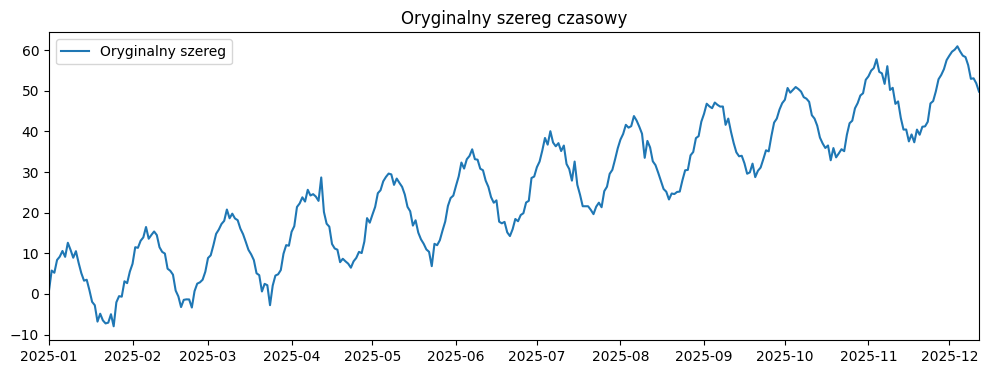

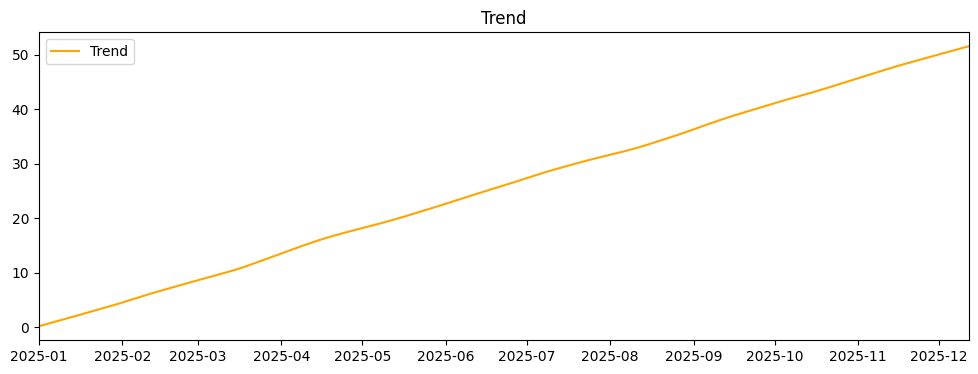

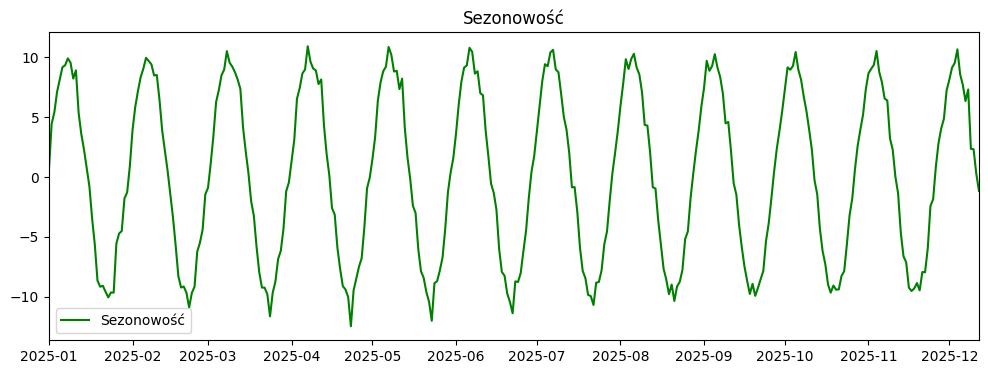

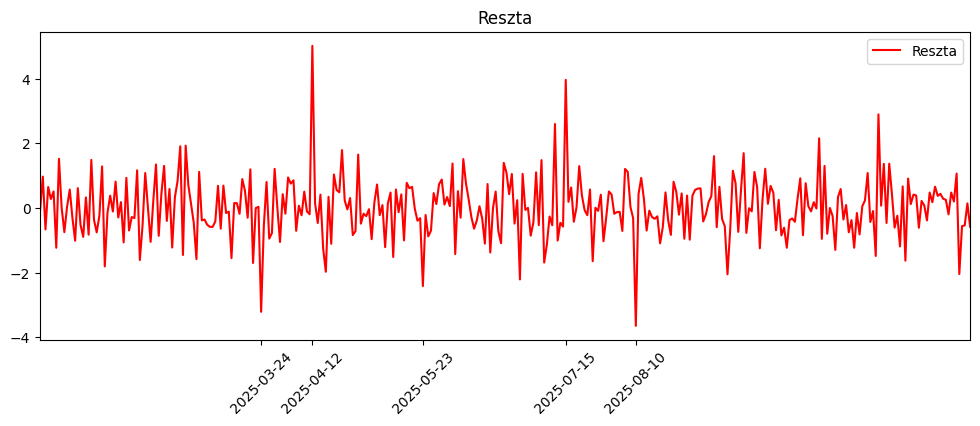

In [529]:
x_start = pd.Timestamp("2025-01-01")
x_end   = pd.Timestamp("2025-12-12")

# Oryginalny szereg
plt.figure(figsize=(12,4))
plt.plot(ts_data.index, ts_data['value'], label='Oryginalny szereg')
plt.title('Oryginalny szereg czasowy')
plt.legend()
plt.xlim(x_start, x_end)
plt.show()

# Trend
plt.figure(figsize=(12,4))
plt.plot(ts_data.index, trend, label='Trend', color='orange')
plt.title('Trend')
plt.legend()
plt.xlim(x_start, x_end)
plt.show()

# Sezonowość
plt.figure(figsize=(12,4))
plt.plot(ts_data.index, seasonal, label='Sezonowość', color='green')
plt.title('Sezonowość')
plt.legend()
plt.xlim(x_start, x_end)
plt.show()

# Reszta
plt.figure(figsize=(12,4))
plt.plot(ts_data.index, resid, label='Reszta', color='red')
plt.title('Reszta')
plt.legend()
plt.xticks(anomaly_dates, [d.strftime("%Y-%m-%d") for d in anomaly_dates], rotation=45)
plt.xlim(x_start, x_end)
plt.show()

## Wykrywanie anomalii za pomocą progu odchylenia standardowego

In [530]:
# Wykrywanie anomalii: wartości odstające powyżej 3 odchyleń standardowych od średniej
threshold = 3 * np.std(resid)
anomalies = np.abs(resid) > threshold
anomaly_dates = ts_data.index[anomalies]
anomaly_values = ts_data['value'][anomalies]
print("Wykryte anomalie:", anomaly_dates)

Wykryte anomalie: DatetimeIndex(['2025-03-24', '2025-04-12', '2025-07-15', '2025-08-10',
               '2025-11-08'],
              dtype='datetime64[ns]', name='date', freq=None)


## Wizualizacja wykrytych anomalii

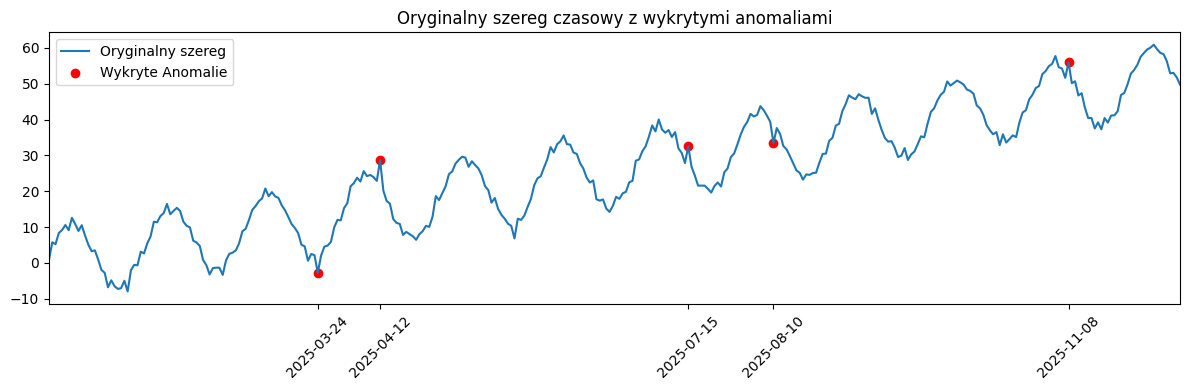

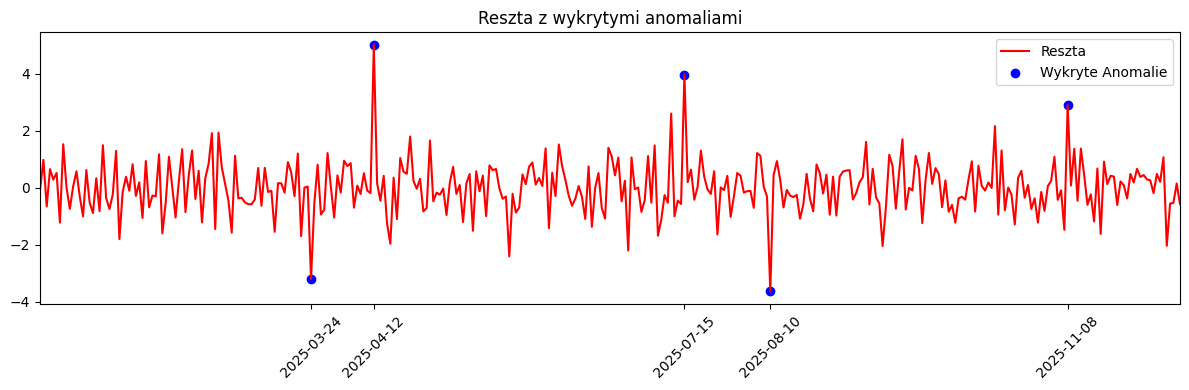

In [531]:
plt.figure(figsize=(12, 4))
plt.plot(ts_data.index, ts_data['value'], label='Oryginalny szereg')
plt.scatter(anomaly_dates, ts_data.loc[anomaly_dates, 'value'], color='red', label='Wykryte Anomalie')
plt.title('Oryginalny szereg czasowy z wykrytymi anomaliami')
plt.legend()
plt.xticks(anomaly_dates, [d.strftime("%Y-%m-%d") for d in anomaly_dates], rotation=45)
plt.xlim(x_start, x_end)
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 4))
plt.plot(ts_data.index, resid, label='Reszta', color='red')
plt.scatter(anomaly_dates, resid.loc[anomaly_dates], color='blue', label='Wykryte Anomalie')
plt.title('Reszta z wykrytymi anomaliami')
plt.legend()
plt.xticks(anomaly_dates, [d.strftime("%Y-%m-%d") for d in anomaly_dates], rotation=45)
plt.xlim(x_start, x_end)
plt.tight_layout()
plt.show()